# 7-6. 프로젝트: 고양이 수염 스티커 만들기

오늘 배운 내용을 이용해서 여러분 만의 스티커를 만들고 적용해보겠습니다.

주요 라이브러리 버전을 확인해 보고 시작하죠!

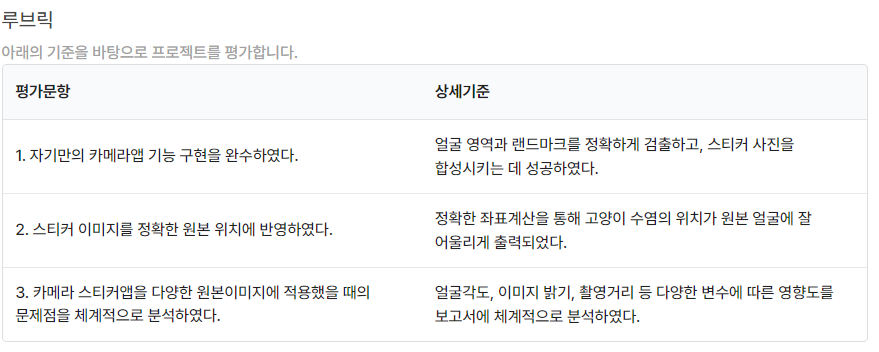

In [1]:
# pip install opencv-python

In [2]:
# pip install cmake

In [3]:
# conda install -c conda-forge dlib

In [4]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
print("🌫🛸")

🌫🛸


In [5]:
print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


### Step 1. 스티커 구하기 or 만들기
----
스티커를 만들거나 구해야합니다. PPT, 포토샵 등을 이용해서 직접 만드셔도 좋습니다. 보다 간단한 방법은 픽토그램 아이콘을 이용하면 쉽게 만들 수 있습니다.

고양이는 사랑스럽기 때문에 고양이 수염 스티커를 붙여보겠습니다.

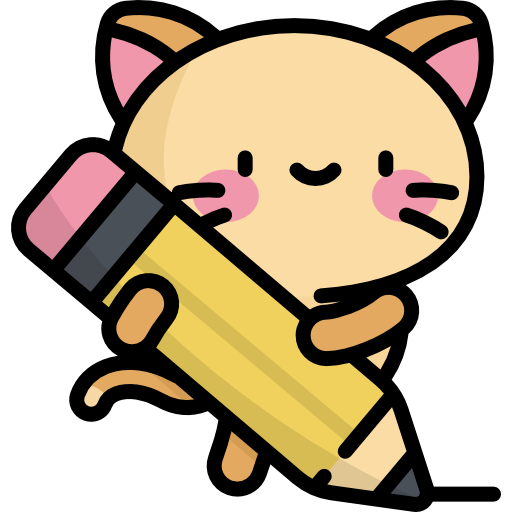

온라인 집사의 삶..

마침 flaticon 사이트에 고양이 수염 이미지가 공개되어 있습니다.

- [고양이 수염 이미지](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1#)

(1) 고양이 수염 이미지를 다운로드 받아주세요.

(2) 여러분의 셀카 이미지도 촬영해 주세요.

### Step 2. 얼굴 검출 & 랜드마크 검출 하기
----
오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

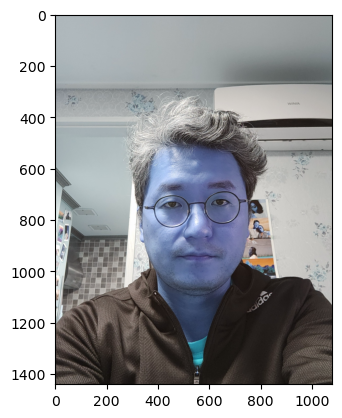

In [6]:
my_image_path = './images/center.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

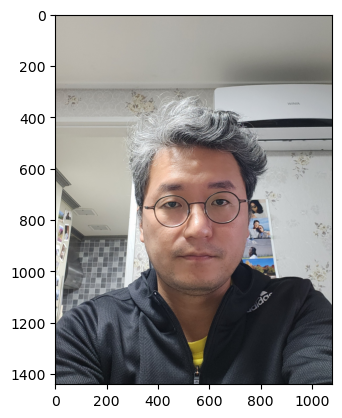

In [7]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

### Step 3. 스티커 적용 위치 확인하기
----
고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

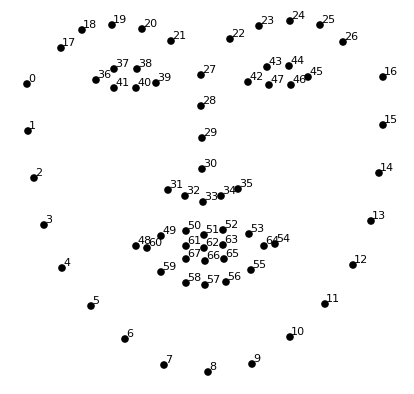

코 끝인 33 번보다 좋은 위치가 있을 거예요.

### 1. detector 선언

In [8]:
detector_hog = dlib.get_frontal_face_detector()

### 2. dectector_hog를 이용해 얼굴 감지

In [9]:
dlib_rects = detector_hog(img_rgb, 3)

In [10]:
print(dlib_rects)

rectangles[[(357, 634) (771, 1048)]]


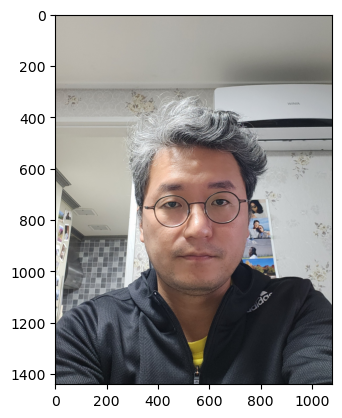

In [11]:
plt.imshow(img_rgb)
plt.show()

In [12]:
img_rgb_copy = img_rgb.copy()

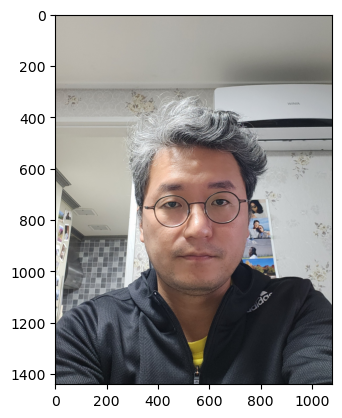

In [13]:
plt.imshow(img_rgb_copy)
plt.show()

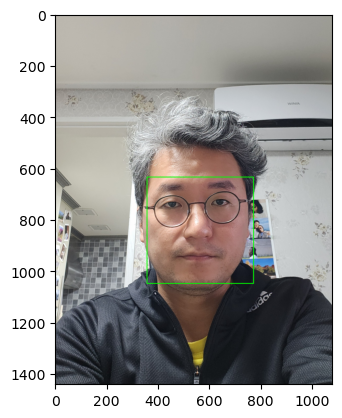

In [14]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 얼굴인식에 관한 소결론
- upampling이 1번 할때와 2번할때는 눈썹을 살짝 침범해서 upampling을 3번하도록 했는데
- 눈썹 부분은 잘 인식했으나 이번엔 사진기준 왼쪽 얼굴 윤곽선을 침범했다.



### Dlib landmark localization

In [15]:
model_path = './models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)

In [16]:
list_landmarks = []

for dlib in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


- lanmark 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

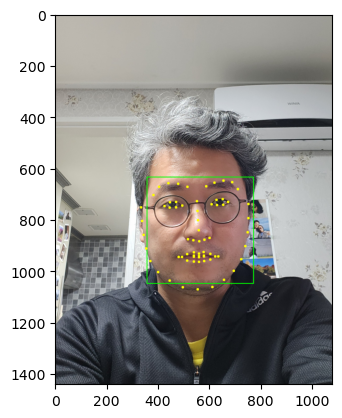

In [17]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 255, 255), -1)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show

### landmark detection에 관한 소결론
1. 얼굴로 인식한 영역 밖이어도 얼굴의 윤곽선을 잘 잡아내고 있다. 

### Step 4. 스티커 적용하기
----
(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

### 얼굴 좌표 획득
- 일단 무지성으로 스티커 적용한다. 

In [18]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(558, 841)
(x,y) : (558,841)
(w,h) : (415,415)


In [19]:
sticker_image_path = './images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_image_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(415, 415, 3)


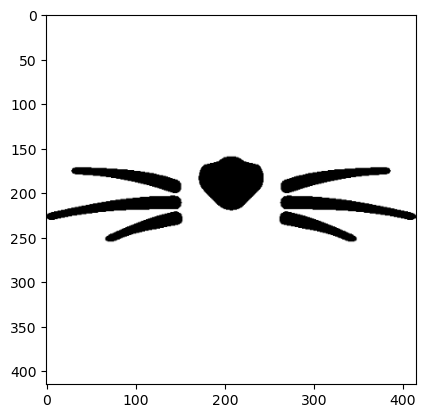

In [20]:
plt.imshow(img_sticker)
plt.show()

In [21]:
refined_x = x - w //2
refined_y = y - h //2

In [22]:
print(refined_x, refined_y)

351 634


In [23]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

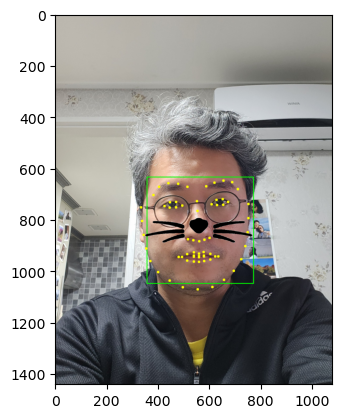

In [24]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 스티커 적용 소결론1
- 일단 코끝은 적당한 위치가 아닌거 같다. 

In [25]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(560, 884)
(x,y) : (560,884)
(w,h) : (415,415)


In [26]:
refined_x = x - w //2
refined_y = y - h //2

In [27]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

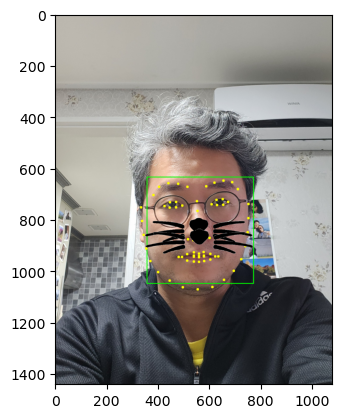

In [28]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 조금 괴물 같이 나왔지만 코부다는 코밑에 합성하는 것이 더 자연스러울 것 같다. 
- 이제 제대로 합성해보자

In [29]:
img_result = img_bgr.copy()

In [30]:
sticker_area = img_result[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_result[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

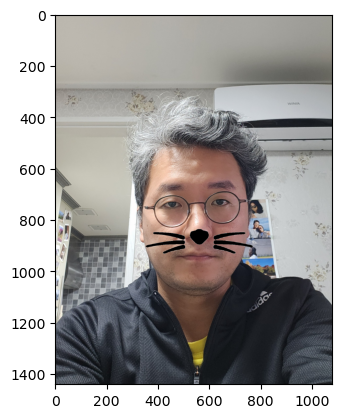

In [31]:
plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.show()

### Step 5. 문제점 찾아보기
----
(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

> 오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.
> 
> - 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
> - 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
> - 실행 속도가 중요할까요?
> - 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

In [32]:
# my_image_path = './images/cat-whiskers.png' # 본인 이미지가 있는 경로를 가지고 온다.
# img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
# img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
# plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
# plt.show() # 이미지를 출력해준다. (실제 출력)

In [33]:
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
# plt.show() # 이미지 실제 출력|

# 회고


### 확인한점
- opencv는 bgr 색영역을 쓰고, 다른 모듈들은 rgb 색영역을 쓰기 때문에 rgb로 변환해 놓고, 사용하게 되면 서로의 색공간이 달라서 색이 왜곡되는 경우가 발생한다. 그래서 bgr과 rgb 색영역에 대해 각각 하나씩 만들어 놓고 그때 그때 필요한 이미지를 불러와서 진행해야 색이 왜곡되지 않는다. 
    - 여기서는 img_rgb가 rgb영역이고 object detection을 하는 대상 이미지이고, img_show가 bgr영역이면서 여러 처리결과를 시각화 하는 대상이다. 